# Bank Market Prediction Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\MY PC\Desktop\bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [5]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [6]:
print("mean of pdays is {}".format(df.pdays.mean()))
print("median of pdays is {}".format(df.pdays.median()))
print("minimum value of pdays is {}".format(df.pdays.min()))

mean of pdays is 40.19782796222158
median of pdays is -1.0
minimum value of pdays is -1


In [7]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

#### The value -1 is present for more than 80%

In [8]:
relevant_data = df[df.pdays != -1]
relevant_data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [9]:
print("mean of pdays is {}".format(relevant_data.pdays.mean()))
print("median of pdays is {}".format(relevant_data.pdays.median()))
print("minimum value of pdays is {}".format(relevant_data.pdays.min()))

mean of pdays is 224.57769165556496
median of pdays is 194.0
minimum value of pdays is 1


#### By not considering values of -1, the mean and median are significantly different now from the previous scenario.

In [10]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'EDUCATION VS BALANCE')

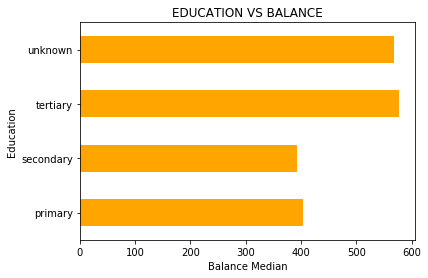

In [11]:
df.groupby("education").balance.median().plot(kind = "barh",color = "orange")
plt.xlabel("Balance Median")
plt.ylabel("Education")
plt.title("EDUCATION VS BALANCE")

Text(0.5, 1.0, 'Boxplot with pdays = -1')

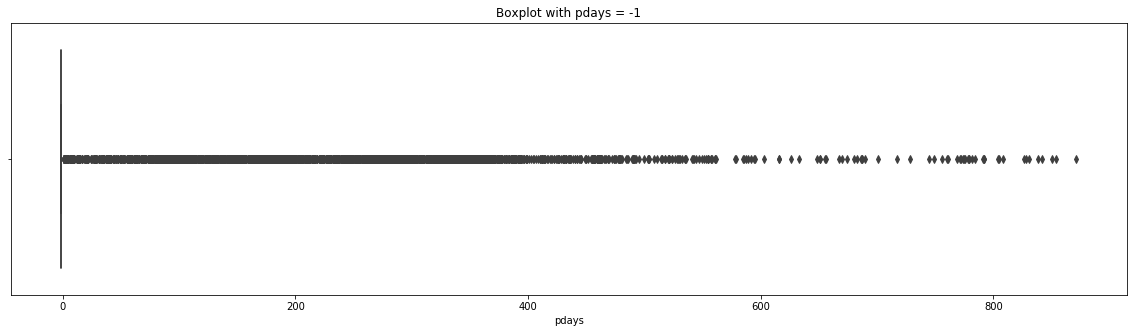

In [12]:
plt.subplots(figsize = (20,5))
sns.boxplot(df.pdays)
plt.title("Boxplot with pdays = -1")

Text(0.5, 1.0, 'Boxplot without pdays = -1')

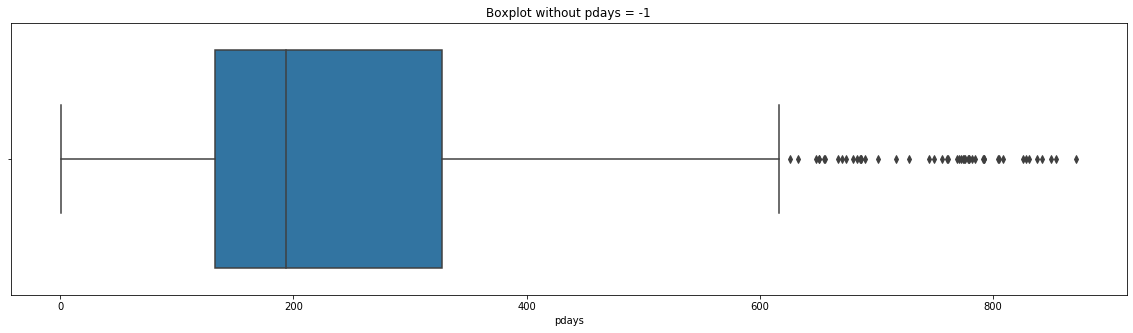

In [13]:
plt.subplots(figsize = (20,5))
sns.boxplot(relevant_data.pdays)
plt.title("Boxplot without pdays = -1")

##### YES THERE ARE OUTLIERS PRESENT IN PDAYS.

# EDA

In [14]:
df["response"] = df["response"].map({"yes" : 1 , "no" : 0}) 

In [15]:
data = df.corr()

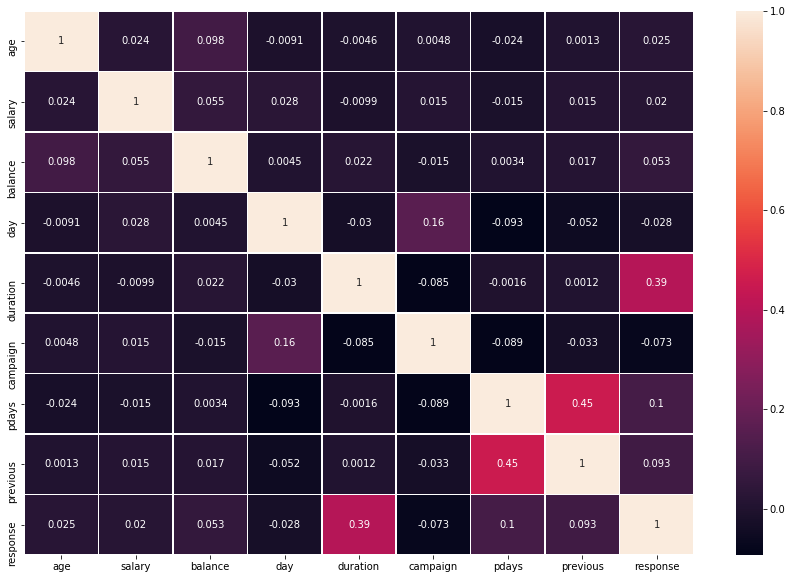

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(data , annot = True  , linewidth = 0.5)

#### Here we can see that target variable "response" is showing a satisfactory correlation with "duration" only. 

In [18]:
num_features = list(df._get_numeric_data().columns)
all_columns = list(df.columns)

In [19]:
cat_columns = []
for i in all_columns :
    if i not in num_features:
        cat_columns.append(i)
print(cat_columns)    

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


# ANALYZING CATAGORICAL VARIABLES

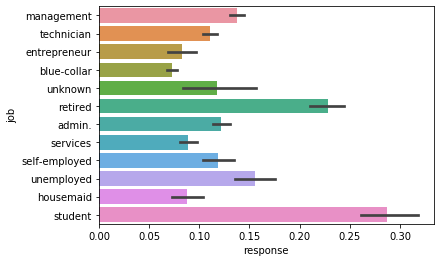

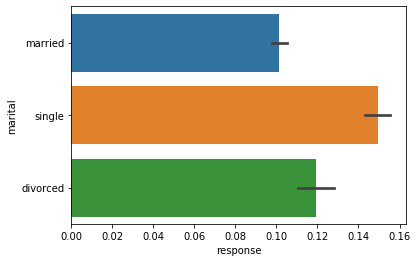

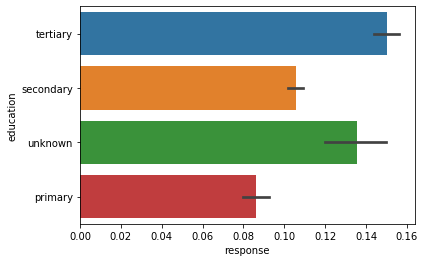

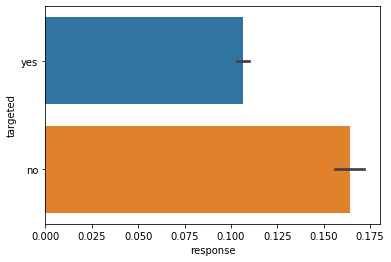

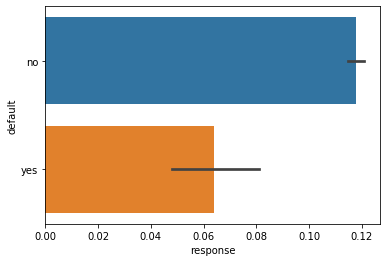

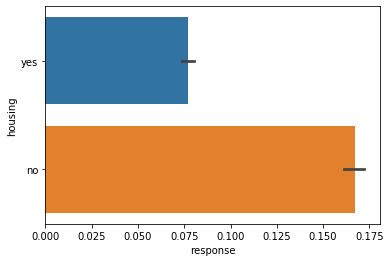

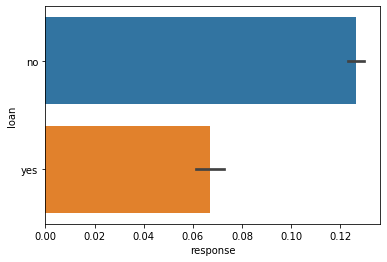

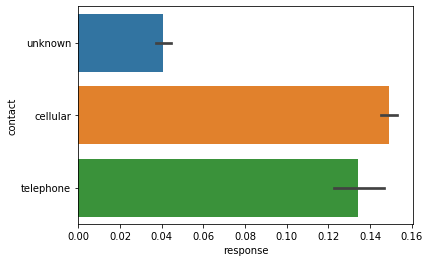

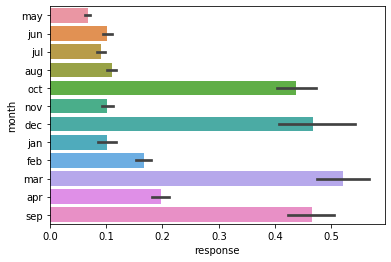

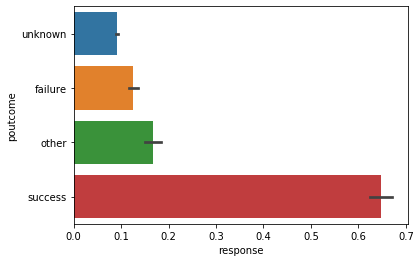

In [20]:
for i in cat_columns :
    sns.barplot(df["response"] , df[i])
    plt.show()

### ANALYZED RESULTS

1. Students and retired persons have given a good response.
2. Unmarried people and people with tertiary education have given a good response.
3. Non-defaulters and people with no housing and no loan have also given good response.
4. Cellular medium,when used for contact,has resulted in good response.
5. People with successful previous outcome has given good response.
6. Responses have been recorded the best in the month of March,followed by October and December.

# ANALYZING NUMERICAL VARIABLES

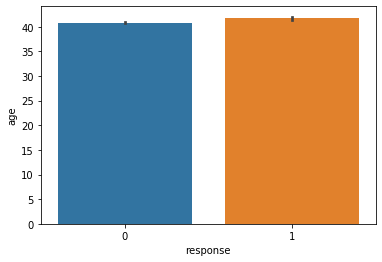

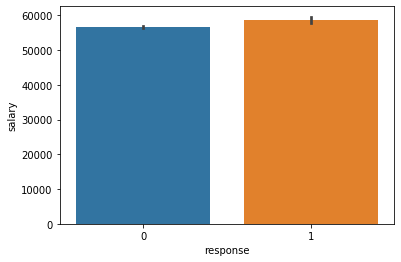

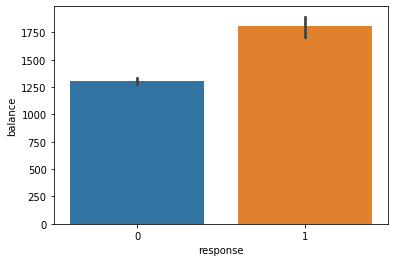

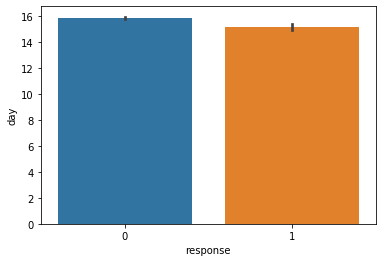

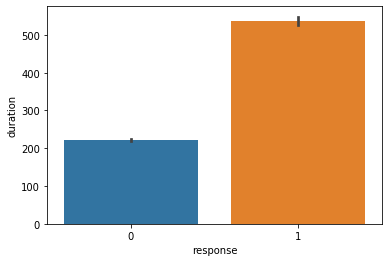

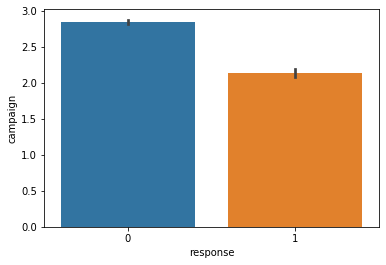

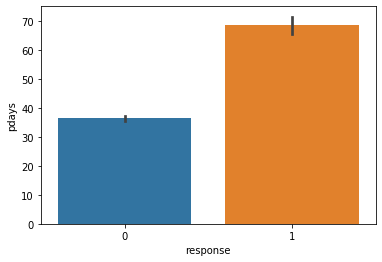

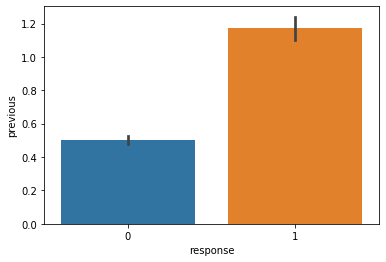

In [21]:
for i in num_features[:-1] :
    sns.barplot(df["response"] , df[i])
    plt.show()

### ANALYZED RESULTS

1. Average age and average salary has not been a highly differentitating factor for determining responses.
2. People with average balance of 1300+ has given positive response.
3. People with duration of 250+ have given positive response.
4. Campaign more than 2 has resulted in negative responses.
5. When previous contact has been made, people have provided positive response.

# DATA PROCESSING

In [22]:
data = df[num_features]
data

,age,salary,balance,day,duration,campaign,pdays,previous,response
0,58,100000,2143,5,261,1,-1,0,0
1,44,60000,29,5,151,1,-1,0,0
2,33,120000,2,5,76,1,-1,0,0
3,47,20000,1506,5,92,1,-1,0,0
4,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1
45207,71,55000,1729,17,456,2,-1,0,1
45208,72,55000,5715,17,1127,5,184,3,1
45209,57,20000,668,17,508,4,-1,0,0


In [23]:
data_cat = df[cat_columns]
data_cat

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,yes,no,yes,no,unknown,may,unknown
1,technician,single,secondary,yes,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,yes,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,yes,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,yes,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,yes,no,no,no,telephone,nov,unknown


In [24]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

In [25]:
data_new = data_cat.apply(lb_encode.fit_transform)
data_new

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,4,1,2,1,0,1,0,2,8,3
1,9,2,1,1,0,1,0,2,8,3
2,2,1,1,1,0,1,1,2,8,3
3,1,1,3,0,0,1,0,2,8,3
4,11,2,3,0,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,3
45207,5,0,0,1,0,0,0,0,9,3
45208,5,1,1,1,0,0,0,0,9,2
45209,1,1,1,1,0,0,0,1,9,3


In [26]:
df_new = data.join(data_new)
df_new

,age,salary,balance,day,duration,campaign,pdays,previous,response,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,58,100000,2143,5,261,1,-1,0,0,4,1,2,1,0,1,0,2,8,3
1,44,60000,29,5,151,1,-1,0,0,9,2,1,1,0,1,0,2,8,3
2,33,120000,2,5,76,1,-1,0,0,2,1,1,1,0,1,1,2,8,3
3,47,20000,1506,5,92,1,-1,0,0,1,1,3,0,0,1,0,2,8,3
4,33,0,1,5,198,1,-1,0,0,11,2,3,0,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1,9,1,2,1,0,0,0,0,9,3
45207,71,55000,1729,17,456,2,-1,0,1,5,0,0,1,0,0,0,0,9,3
45208,72,55000,5715,17,1127,5,184,3,1,5,1,1,1,0,0,0,0,9,2
45209,57,20000,668,17,508,4,-1,0,0,1,1,1,1,0,0,0,1,9,3


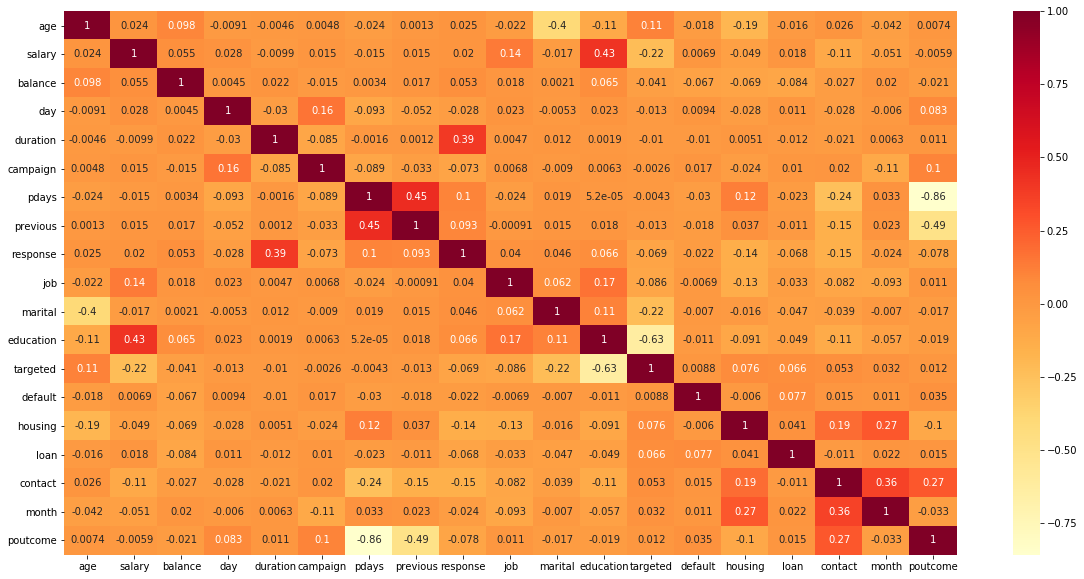

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr() , annot = True , cmap = "YlOrRd")

In [28]:
df.groupby(["response" , "previous"]).size()

response  previous
0         0           33570
          1            2189
          2            1650
          3             848
          4             543
                      ...  
1         26              1
          29              1
          30              1
          55              1
          58              1
Length: 66, dtype: int64

###### Yes the previous campaign data is useful as it gives us an insight about the number of times the person has been contacted before this campaign and thus it would be utilised while predicting the response regarding the probability that the person will respond,provided the contact has been made.

In [29]:
df.groupby(["response" , "poutcome"]).size()

response  poutcome
0         failure      4283
          other        1533
          success       533
          unknown     33573
1         failure       618
          other         307
          success       978
          unknown      3386
dtype: int64

#### As being stated above 'pdays' holds 80% of the values as -1 and also from the heatmap we can see that 'pdays' and 'poutcome' are not much associated with 'response'. But also we can see that if 'poutcome' is success then there is a high chance that response will be yes.

#### Hence we would drop only 'pdays' column.

# MODELLING

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report , accuracy_score , f1_score , roc_auc_score , confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
X_data = df_new.drop(['response' , 'pdays'] , axis = 1)
Y_data = df_new['response']

In [32]:
x_train , x_test , y_train , y_test = train_test_split(X_data , Y_data , test_size = 0.3 , random_state = 42)

In [33]:
lr = LogisticRegression()
lr.fit(x_train , y_train)
y_predict = lr.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test , y_predict)
validation_score = cross_val_score(lr , X_data , Y_data , cv = 5)

In [35]:
print("The accuracy of the model is : {}".format(accuracy * 100) , "%")
print()
print("The F1 Score is :",f1_score(y_predict,y_test) * 100 , "%")
print()
print('The AUC score is :',roc_auc_score(y_test,y_predict) * 100 , "%")
print()
print("The cross validation score of the model is :{}".format(validation_score.mean() * 100) , "%")
print()
print("The confusion matrix is as follows : \n" , confusion_matrix(y_test , y_predict))
print()
print('The classification report is as follows:\n',classification_report(y_test , y_predict))

The accuracy of the model is : 88.46947803007961 %

The F1 Score is : 23.781676413255358 %

The AUC score is : 56.75705696804274 %

The cross validation score of the model is :87.66887555813297 %

The confusion matrix is as follows : 
 [[11756   210]
 [ 1354   244]]

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.54      0.15      0.24      1598

    accuracy                           0.88     13564
   macro avg       0.72      0.57      0.59     13564
weighted avg       0.85      0.88      0.86     13564



### As we can see that the dataset is imbalanced, Hence resampling with replacement has been opted.

In [36]:
Y_data.value_counts()

0    39922
1     5289
Name: response, dtype: int64

In [37]:
from sklearn.utils import resample
data_minority = df_new[df_new["response"] == 1]
data_majority = df_new[df_new["response"] == 0]
data_minority_resampled = resample(data_minority , n_samples = 39922 , replace = True , random_state = 1)
df_data_new = pd.concat([data_majority , data_minority_resampled])

In [38]:
x_data = df_data_new.drop(['response' , 'pdays'] , axis = 1)
y_data = df_data_new["response"]

In [39]:
X_train , X_test , Y_train , Y_test = train_test_split(x_data , y_data , test_size = 0.3 , random_state = 42)

In [40]:
lr = LogisticRegression()
lr.fit(X_train , Y_train)
Y_predict = lr.predict(X_test)

In [41]:
accuracy1 = accuracy_score(Y_test , Y_predict)
validation_score1 = cross_val_score(lr , x_data , y_data , cv = 5)

In [42]:
print("The accuracy of the model is : {}".format(accuracy1 * 100) , "%")
print()
print("The F1 Score is :",f1_score(Y_predict,Y_test) * 100 , "%")
print()
print('The AUC score is :',roc_auc_score(Y_test,Y_predict) * 100 , "%")
print()
print("The cross validation score of the model is :{}".format(validation_score1.mean() * 100) , "%")
print()
print("The confusion matrix is as follows : \n" , confusion_matrix(Y_test , Y_predict))
print()
print('The classification report is as follows:\n',classification_report(Y_test , Y_predict))

The accuracy of the model is : 75.64081155548133 %

The F1 Score is : 75.22187778674252 %

The AUC score is : 75.64227594294533 %

The cross validation score of the model is :69.38154504261827 %

The confusion matrix is as follows : 
 [[9262 2705]
 [3130 8857]]

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76     11967
           1       0.77      0.74      0.75     11987

    accuracy                           0.76     23954
   macro avg       0.76      0.76      0.76     23954
weighted avg       0.76      0.76      0.76     23954



In [43]:
model = sm.OLS(y_data , x_data)
model1 = model.fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              9449.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                        0.00
Time:                        16:34:36   Log-Likelihood:                         -41601.
No. Observations:               79844   AIC:                                  8.324e+04
Df Residuals:                   79827   BIC:                                  8.339e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
pd.Series([variance_inflation_factor(x_data.values, i) 
               for i in range(x_data.shape[1])], 
              index=x_data.columns)

age          10.934789
salary        5.136532
balance       1.277515
day           4.325380
duration      2.160299
campaign      1.945316
previous      1.459314
job           3.014808
marital       4.411775
education     6.355347
targeted      6.326381
default       1.027224
housing       2.109877
loan          1.185311
contact       1.681379
month         4.260235
poutcome      8.792594
dtype: float64

In [45]:
from sklearn.feature_selection  import RFE

In [46]:
rfe = RFE(lr , 14)
rfe.fit(X_train , Y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=14, step=1, verbose=0)

In [47]:
new_columns = X_train.columns[rfe.support_]
lr.fit(X_train[new_columns] , Y_train)
Y_predict_new = lr.predict(X_test[new_columns])

In [48]:
accuracy_new = accuracy_score(Y_test , Y_predict_new)
validation_score_new = cross_val_score(lr , x_data , y_data , cv = 5)

In [49]:
print("The accuracy of the model is : {}".format(accuracy_new * 100) , "%")
print()
print("The F1 Score is :",f1_score(Y_predict_new,Y_test) * 100 , "%")
print()
print('The AUC score is :',roc_auc_score(Y_test,Y_predict_new) * 100 , "%")
print()
print("The cross validation score of the model is :{}".format(validation_score_new.mean() * 100) , "%")
print()
print("The confusion matrix is as follows : \n" , confusion_matrix(Y_test , Y_predict_new))
print()
print('The classification report is as follows:\n',classification_report(Y_test , Y_predict_new))

The accuracy of the model is : 79.79460632879686 %

The F1 Score is : 79.743868753662 %

The AUC score is : 79.79487108917729 %

The cross validation score of the model is :69.38154504261827 %

The confusion matrix is as follows : 
 [[9587 2380]
 [2460 9527]]

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     11967
           1       0.80      0.79      0.80     11987

    accuracy                           0.80     23954
   macro avg       0.80      0.80      0.80     23954
weighted avg       0.80      0.80      0.80     23954



Text(0.5, 1.0, 'Features Vs. Importance')

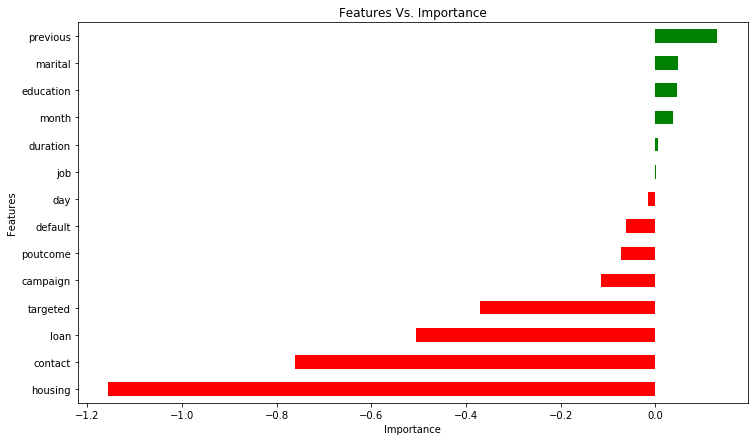

In [50]:
frame = pd.DataFrame()
frame['Features'] = new_columns
frame['Importance'] = lr.coef_[0]
frame['positive'] = frame['Importance'] > 0
frame.set_index("Features" , inplace = True)
frame.sort_values(by = ["Importance"] , ascending = True , inplace = True)
frame.Importance.plot(kind = 'barh' , figsize=(12, 7), color = frame.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')
plt.title("Features Vs. Importance")

# RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rfc = RandomForestClassifier(n_estimators = 50 , max_leaf_nodes = 30 , max_depth = 10 , max_features = 10 , random_state = 1)
rfc.fit(X_train , Y_train)
y_predicted = rfc.predict(X_test)

In [52]:
print("The accuracy of the model is :" , accuracy_score(Y_test , y_predicted) * 100 , "%")
print()
print("The F1 Score is :",f1_score(y_predicted,Y_test) * 100 , "%")
print()
print('The AUC score is :',roc_auc_score(Y_test,y_predicted) * 100 , "%")
print()
print("The cross validation score of the model is : " , cross_val_score(rfc , x_data , y_data , cv = 5).mean() * 100 , "%")
print()
print("The confusion matrix is as follows : \n" , confusion_matrix(Y_test , y_predicted))
print()
print('The classification report is as follows:\n',classification_report(Y_test , y_predicted))

The accuracy of the model is : 84.75411204809218 %

The F1 Score is : 85.28250181349239 %

The AUC score is : 84.75117353847075 %

The cross validation score of the model is :  73.57832861539976 %

The confusion matrix is as follows : 
 [[ 9721  2246]
 [ 1406 10581]]

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     11967
           1       0.82      0.88      0.85     11987

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954



Text(0.5, 1.0, 'Features Vs. Importance')

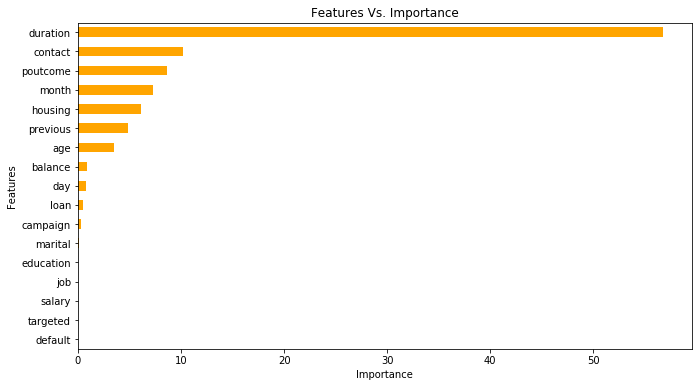

In [53]:
data_frame = pd.DataFrame()
data_frame['importance'] = rfc.feature_importances_ * 100
data_frame['features'] = X_train.columns
data_frame.set_index('features' , inplace = True)
data_frame.sort_values(by = ["importance"] , ascending = True , inplace = True)
data_frame.importance.plot(kind = 'barh' , figsize = (11,6) , color = 'orange')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features Vs. Importance')

# COMPARISON

In [54]:
print("Accuracy of Logistic Regression model : {}".format(accuracy_new * 100) , "%")
print("AUC score of Logistic Regression model  :",roc_auc_score(Y_test,Y_predict_new) * 100 , "%")
print()
print()
print("Accuracy of Random Forest model :" , accuracy_score(Y_test , y_predicted) * 100 , "%")
print("AUC score of Random Forest model :" ,roc_auc_score(Y_test,y_predicted) * 100 , "%")

Accuracy of Logistic Regression model : 79.79460632879686 %
AUC score of Logistic Regression model  : 79.79487108917729 %


Accuracy of Random Forest model : 84.75411204809218 %
AUC score of Random Forest model : 84.75117353847075 %


#### We solved the problems of imbalance and overfitting in this case so we choose accuracy score and also AUC score as the performace metrics to compare between the two models as its a binary classification problem and AUC score will help us understand our model on the degree of separability it will provide.

#### It can clearly be seen from the above analysis that Random forest performs better than Logistic regression model.

#### The top feature importances for both the models; Random forest and Logistic regression, differs from one another.